In [1]:
from environment import *
from visualise import *
from prepare_representations import *
from compare_models import *

from stable_baselines3 import PPO, A2C, DQN
import pandas as pd

COMPARE ALGORITHMS AND LEARNING RATES

In [ ]:
#Compare Models
env = GridWorldEnv()
hyperparameter_sets = {
        "PPO_Default": (PPO, {"learning_rate": 3e-4, "gamma": 0.99, "n_steps": 2048}),
        "PPO_LR_1e-3": (PPO, {"learning_rate": 1e-3, "gamma": 0.99, "n_steps": 2048}),
        "A2C_Default": (A2C, {"learning_rate": 7e-4, "gamma": 0.99, "n_steps": 5}),
        "A2C_LR_1e-3": (A2C, {"learning_rate": 1e-3, "gamma": 0.99, "n_steps": 5}),
        "DQN_Large_Buffer_Default": (DQN, {"learning_rate": 1e-4, "gamma": 0.99, "buffer_size": 100000}),
        "DQN_Large_Buffer_LR_1e-3": (DQN, {"learning_rate": 1e-3, "gamma": 0.99, "buffer_size": 100000}),
    }

reward_df, trained_models = compare(env, hyperparameter_sets, num_runs=5)


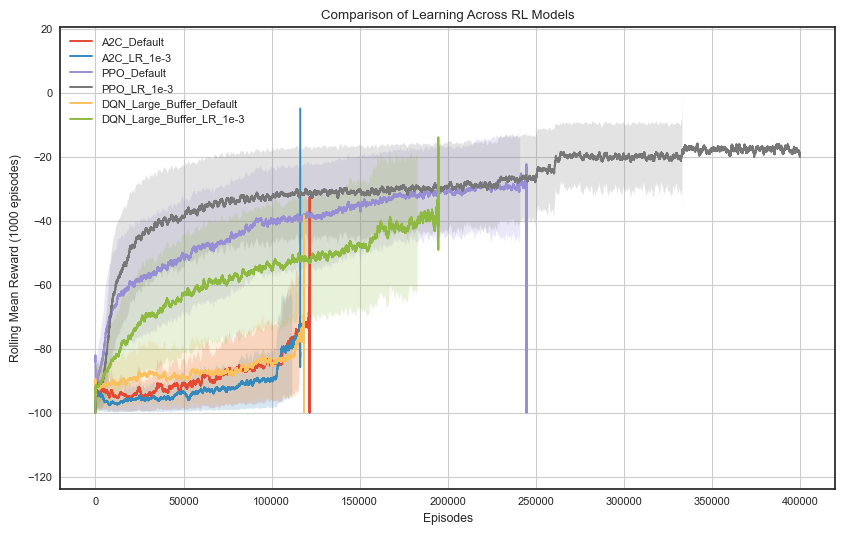

In [ ]:
#Plot Mean Reward
dataframe = pd.read_csv('episode_reward_values_algorithms.csv', header=[0, 1])
models_list = ["A2C_Default", "A2C_LR_1e-3", "PPO_Default", "PPO_LR_1e-3", "DQN_Large_Buffer_Default", "DQN_Large_Buffer_LR_1e-3", ]
plot_title = "Comparison of Learning Across RL Models"

plot_all_models(dataframe, models_list, plot_title)

RELU + WEIGHT DECAY

In [ ]:
## Comparing different weight-decays (i.e., L2 Regularisation)
weight_decay_list = [1e-5, 1e-6, 1e-7]
env = GridWorldEnv()

weight_decay_df, trained_models = compare_weight_decay(env, weight_decay_list, num_runs=5)

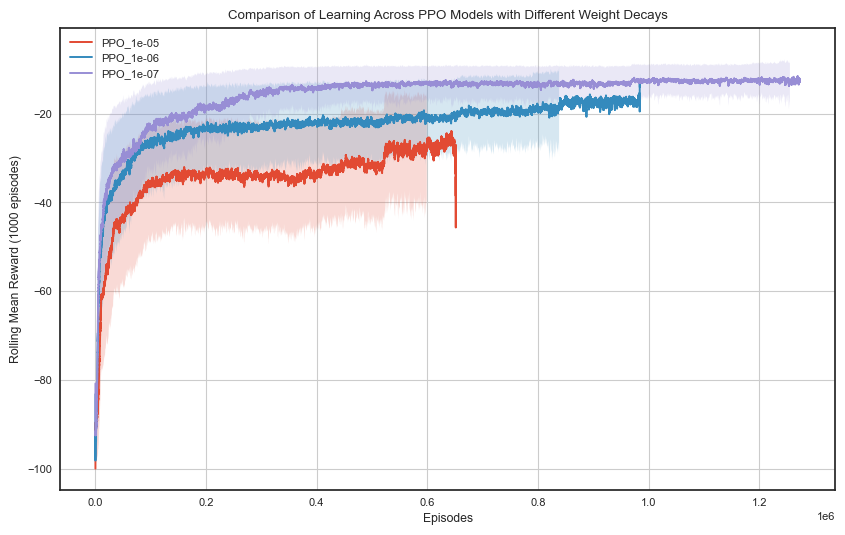

In [4]:
#Visualise comparison
dataframe = pd.read_csv('episode_reward_values_weight_decay.csv', header=[0, 1])
models_list = ["PPO_1e-05", "PPO_1e-06", "PPO_1e-07"]
plot_title = "Comparison of Learning Across PPO Models with Different Weight Decays"

plot_all_models(dataframe, models_list, plot_title, max_episodes=1400000)

PLOTTING

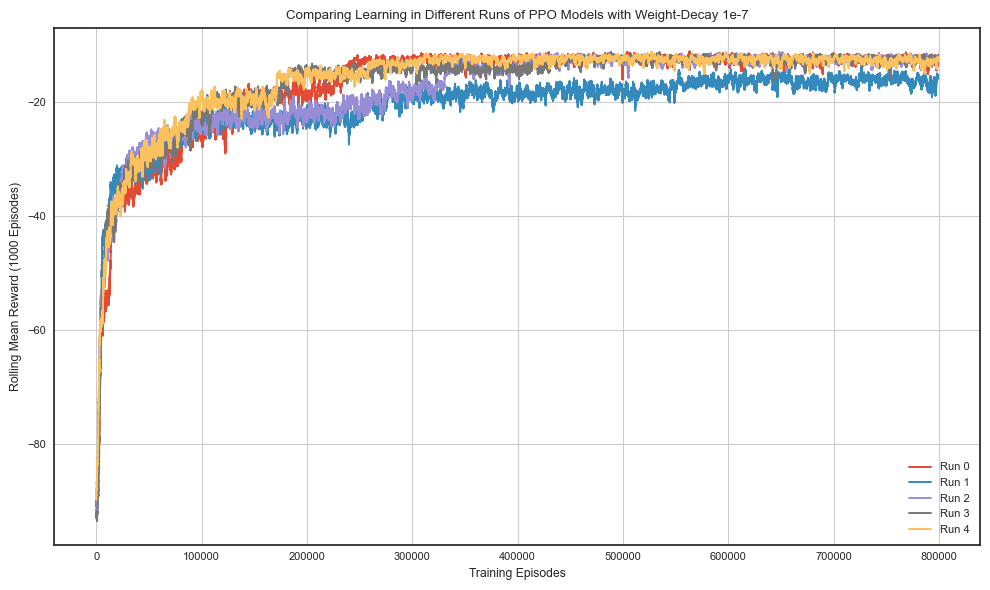

In [6]:
#looking at individual runs in weight decay
dataframe = pd.read_csv('episode_reward_values_weight_decay.csv', header=[0, 1])
weight_decay = "PPO_1e-07"

compare_runs_for_weight_decay(dataframe, weight_decay, max_episodes = 800000, window_size = 1000)


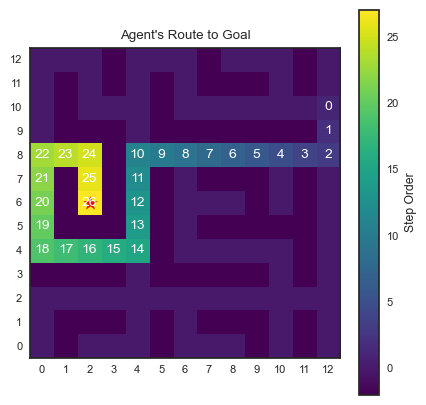

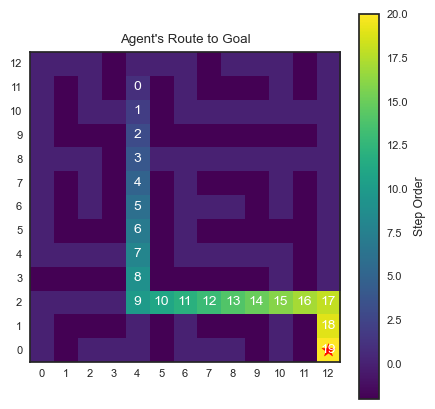

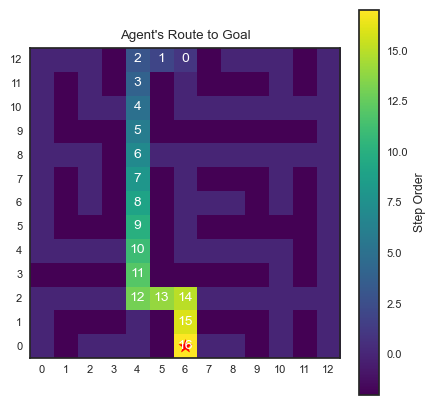

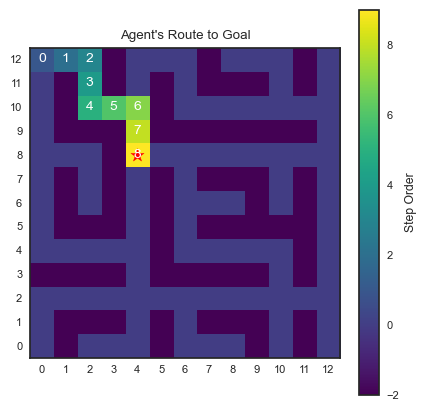

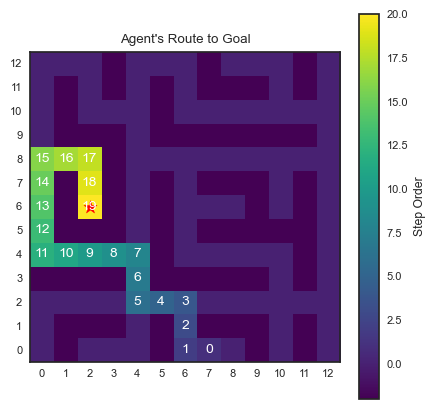

In [10]:
#Select model
model = PPO.load("PPO_Separate.zip")
env = GridWorldEnv()

#visualise trained route
for i in range(5):
    visualize_trained_route(env,model)


In [ ]:
## Extracting representations
store_all_activations(env, model)
store_policy_timestep_activations(env, model, num_repeats=50)
store_value_timestep_activations(env, model, num_repeats=50)

In [ ]:
#Select dataframe to analyse
dataframe1 = pd.read_csv('store_value_timestep_activations.csv', header=[0, 1])
dataframe2 = pd.read_csv('store_policy_timestep_activations.csv', header=[0, 1])

distance_metric1 = "euclidean_distance"
distance_metric2 = "shortest_path"

In [ ]:
## All Plots
env = GridWorldEnv()
interested_units = range(64)

#change dataframe and distance
all_plots(env, dataframe1, distance_metric2, interested_units, num_components=7)

Running permutations: 100%|██████████| 5000/5000 [03:27<00:00, 24.15it/s]


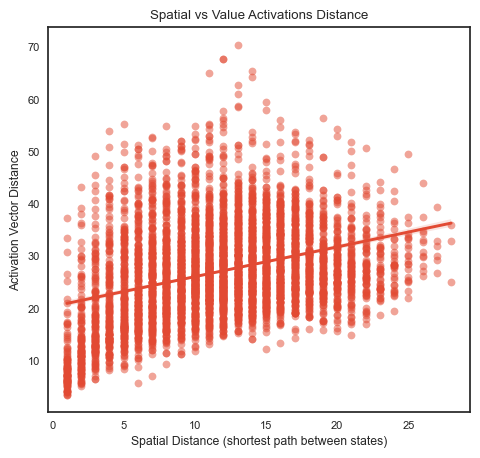

Spearman’s ρ: 0.3425, perm. p = 0.0000


In [ ]:
env = GridWorldEnv()
dataframe = pd.read_csv('store_all_activations.csv', header=[0, 1])
activations_name = "value_activations" #or "policy_activations"

analyze_distance_correlation(env, dataframe, activations_name, distance_metric2)